In [4]:
#importing required libraries

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import matplotlib.image as mpimg #for image plotting
%matplotlib inline

In [5]:
#reading the csv file and printing few lines
df = pd.read_csv('Ab_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#understanding the rows and column data

print(len(df))# amount of rows in df
df.dtypes # data types of columns

48895


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
#checking missing data
a = df.isnull().sum()
print(a)

#dropping uncessary columns
df.drop(['id','host_name','last_review'], axis=1, inplace=True)
df.head()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
#filling 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [9]:
#checking unique values of the neighbourhood column
c = df.neighbourhood_group.unique()
print(c)
d = len(df.neighbourhood.unique())
print(d)

#checking  the type of room types of the dataset
b = df.room_type.unique()
print(b)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
221
['Private room' 'Entire home/apt' 'Shared room']


In [10]:
#EDA
#checking the total listing of particular ids
top_host=df.host_id.value_counts()
th = top_host.head(10)
print(th)

#confirming our finding with the already exsiting dataset
top_host_check=df.calculated_host_listings_count.max()
print('\n',top_host_check)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

 327


In [11]:
sns.set_theme(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [12]:
#eda based on the host id 
top_host_df = pd.DataFrame(th)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'host_id':'Host_ID', 'count':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


C:\Users\maruv\AppData\Local\Temp\ipykernel_12012\2625046302.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,palette='deep')
C:\Users\maruv\AppData\Local\Temp\ipykernel_12012\2625046302.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

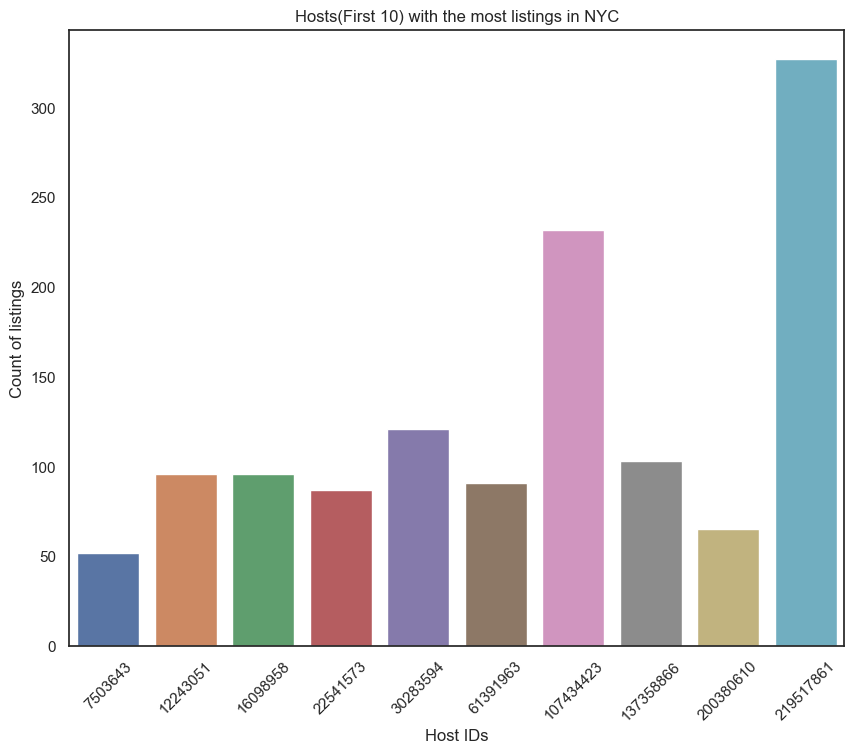

In [13]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,palette='deep')
viz_1.set_title('Hosts(First 10) with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

From the graph there is a good distribution between top 10 hosts with the most listings.Host id-219517861 has more than 300+ listings.

In [14]:
#eda based on NYC Borough
#subcategorising the borough

#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]

#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]

#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]

#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]

#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

#putting all the prices in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5] 
print(price_list_by_n)



[       price
0        149
3         89
6         60
12        89
15       140
...      ...
48882     40
48884    190
48887    170
48890     70
48891     40

[20104 rows x 1 columns],        price
1        225
2        150
4         80
5        200
7         79
...      ...
48886    200
48888    125
48892    115
48893     55
48894     90

[21661 rows x 1 columns],        price
46       130
77        70
143      140
161       79
181      350
...      ...
48858     68
48863     93
48866     58
48878     45
48889     65

[5666 rows x 1 columns],        price
169       70
249       36
250       37
251       37
256       36
...      ...
48441     40
48446    100
48533    450
48649     54
48799    235

[373 rows x 1 columns],        price
171       40
207       45
260       90
261      105
309       90
...      ...
48783    140
48792     80
48795    125
48796     70
48805    100

[1091 rows x 1 columns]]


In [15]:
#empty list to append  with price distributions for each neighbourhood
plbn2=[]

#creating list of known values in nyc borough
borough=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    plbn2.append(i)

#changing names of the price column to the area name for easier reading of the table    
plbn2[0].rename(columns={'price':borough[0]}, inplace=True)
plbn2[1].rename(columns={'price':borough[1]}, inplace=True)
plbn2[2].rename(columns={'price':borough[2]}, inplace=True)
plbn2[3].rename(columns={'price':borough[3]}, inplace=True)
plbn2[4].rename(columns={'price':borough[4]}, inplace=True)

#dataframe for final view    
stat_df=plbn2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


C:\Users\maruv\AppData\Local\Temp\ipykernel_12012\3221747877.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price',palette='icefire' )


Text(0.5, 1.0, 'Density and distribution of prices for each Borough')

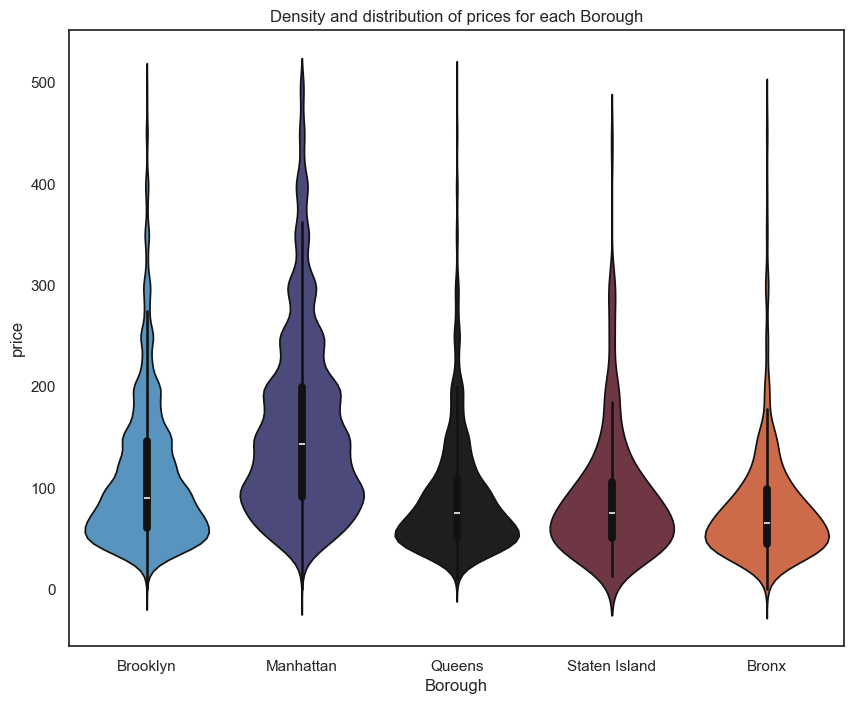

In [16]:
#removing extreme values for better visualisation

#sub-dataframe with values <500
sub_6=df[df.price < 500]

#violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price',palette='icefire' )
plt.xlabel('Borough')
viz_2.set_title('Density and distribution of prices for each Borough')

From the statistical table and violin graph we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with $90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected since Manhattan is one of the most expensive places in the world.

In [17]:
#EDA based on Neighbourhoods of the Borough of new york city 

#top 10 neighbourhoods
df.neighbourhood.value_counts().head(10)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

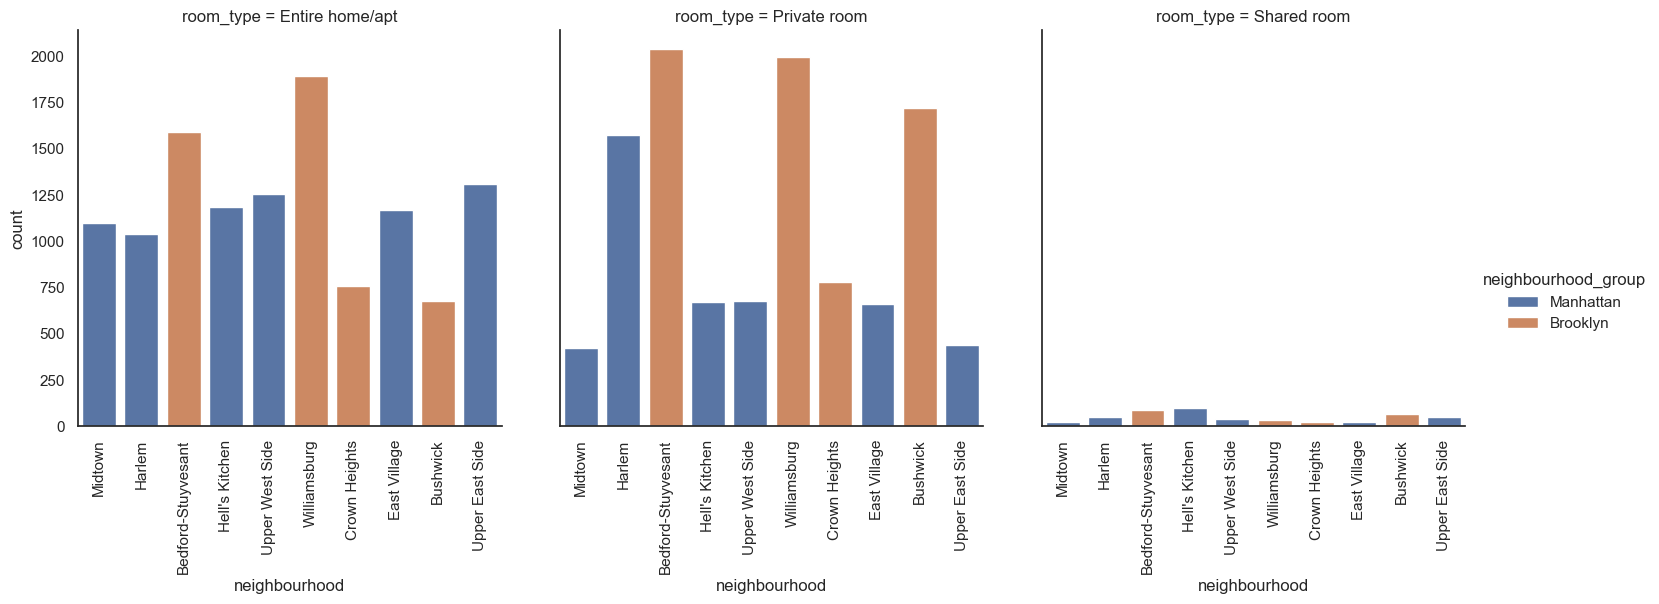

In [18]:
#combining the neigbourhoods with their borough location along with the room type 

sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

#catplot for multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

From the graph the observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighbourhoods. Then, we can see that for these 10 neighbourhoods only 2 boroughs are represented: Manhattan and Brooklyn as Manhattan and Brooklyn are one of the most travelled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn

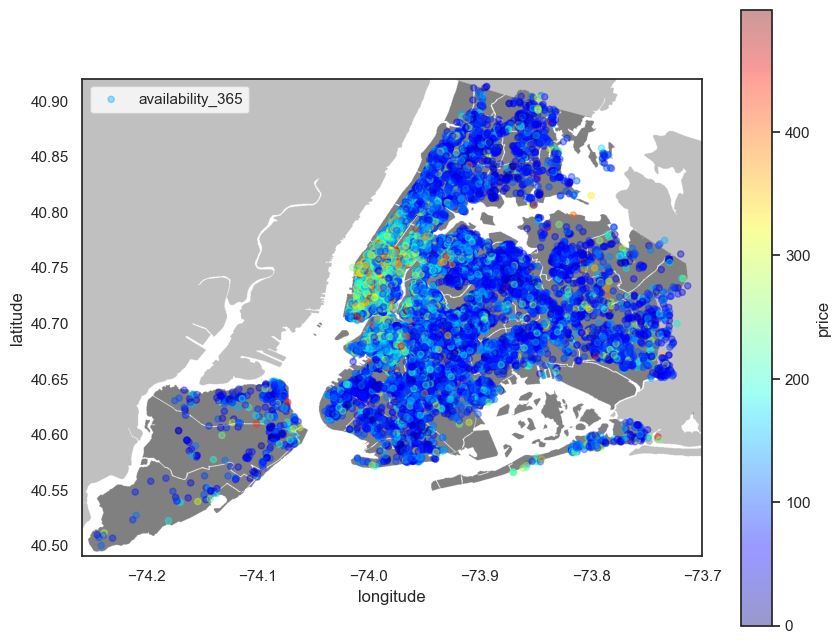

In [19]:
#scatter plot with map to see the density and price across the city 

import urllib

plt.figure(figsize=(10,8))

# Load the NYC image from the URL and save it locally
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
local_path = 'Neighbourhoods_New_York_City_Map.png'
urllib.request.urlretrieve(url, local_path)

# Read the saved image
nyc_img = plt.imread(local_path)

# Plot the image
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

##using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

From the density heatmap using latitude and longitude points were able to visualize all NYC listings. We can see that the average price in midtown Manhattan were significantly more compared to others.

In [20]:
# EDA based on the name / words searched to find lisings 

#creating a empty list to append later
name1=[]

#getting name strings and appending it to the list
for name in df.name:
    name1.append(name)

#function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl

#empty list to count words
names_for_count=[]

#getting name string from our list and using split function, later appending to list above
for x in name1:
    for word in split_name(x):
        word=word.lower()
        names_for_count.append(word)

C:\Users\maruv\AppData\Local\Temp\ipykernel_12012\2868100035.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_4=sns.barplot(x='Words', y='Count', data=sub_w,palette = 'crest')
C:\Users\maruv\AppData\Local\Temp\ipykernel_12012\2868100035.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_4.set_xticklabels(viz_4.get_xticklabels(), rotation=90)


[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

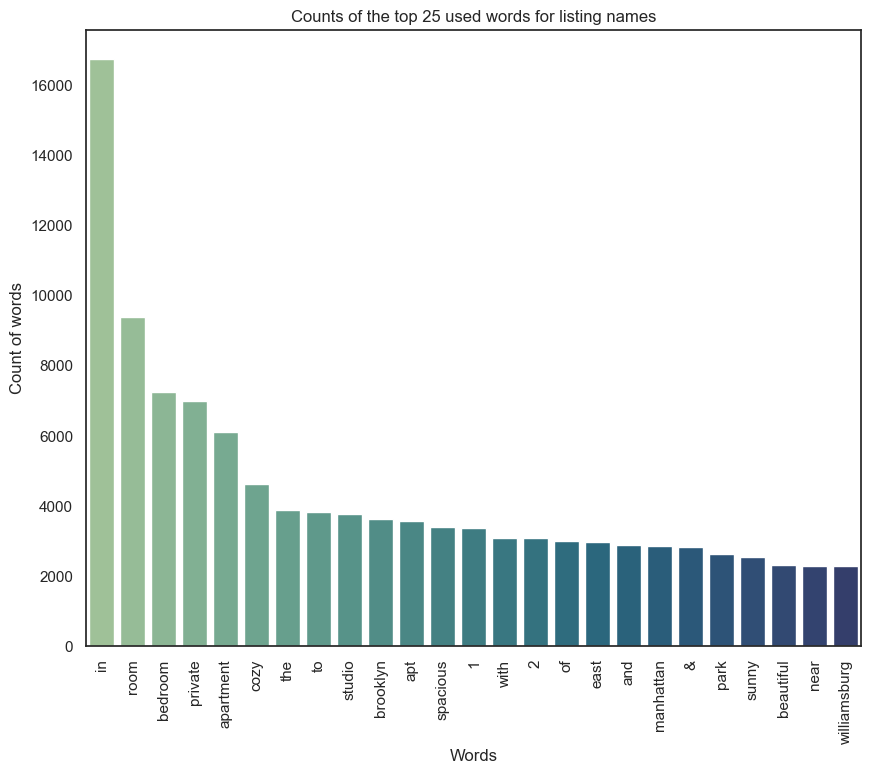

In [21]:
#using counters for hashable objects 
from collections import Counter

#top 25 used words by host to name their listing
top_25_w=Counter(names_for_count).most_common()
top_25_w=top_25_w[0:25]

#making dataframe 
sub_w=pd.DataFrame(top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

#using barplot 
viz_4=sns.barplot(x='Words', y='Count', data=sub_w,palette = 'crest')
viz_4.set_title('Counts of the top 25 used words for listing names')
viz_4.set_ylabel('Count of words')
viz_4.set_xlabel('Words')
viz_4.set_xticklabels(viz_4.get_xticklabels(), rotation=90)

From the graph we can observe that finding out and going over top 25 used listings' name words - we are able to see one clear trend. It shows that hosts are simply describing their listing in a short form with very specific terms for easier search for travellers. Such words are 'room', 'bedroom', 'private', 'apartment', 'studio'. There are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is. 

In [22]:
# EDA Based on reviews 

#top 10 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


From the table output, we can observe that top 10 most reviewed listings on Airbnb for NYC has price average of $65 with most of the listings under $50, and 9/10 of them are 'Private room' type; top reviewed listing has 629 reviews.

C:\Users\maruv\AppData\Local\Temp\ipykernel_12012\3219100634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_5=sns.barplot(x = df['neighbourhood_group'], y = df['number_of_reviews'],palette='Paired' )


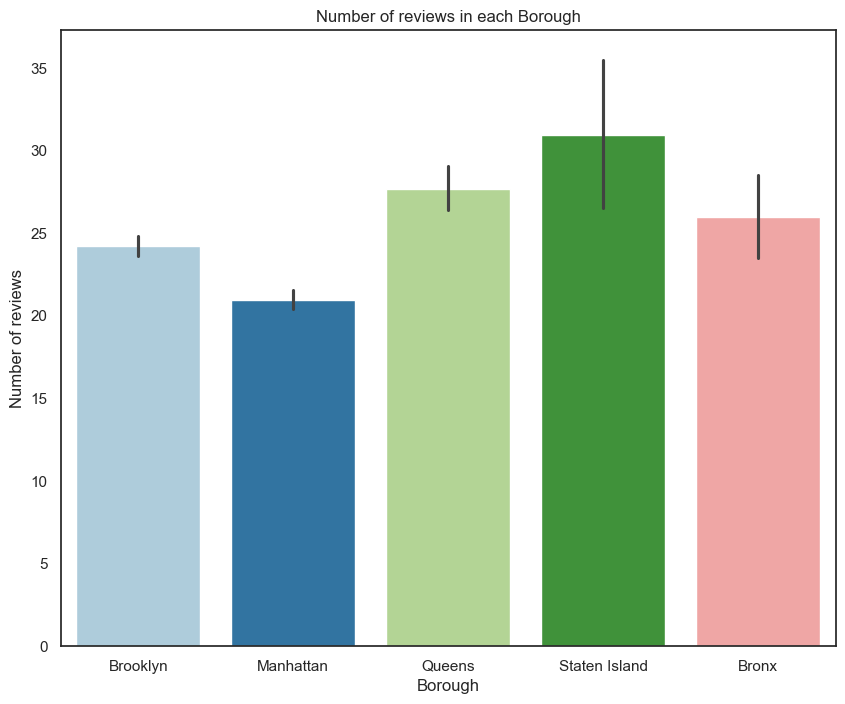

In [23]:
#review as per borough

viz_5=sns.barplot(x = df['neighbourhood_group'], y = df['number_of_reviews'],palette='Paired' )
plt.title('Number of reviews in each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of reviews')
plt.xticks(rotation = 0)
plt.show()

Though Staten Island have less listings, the properties listed have the most reviews and to a stark contrast we can see the Manhattan with the most listings have least number of reviews 

C:\Users\maruv\AppData\Local\Temp\ipykernel_12012\1149953766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_6=sns.countplot(x = 'room_type', data = df,palette='deep')


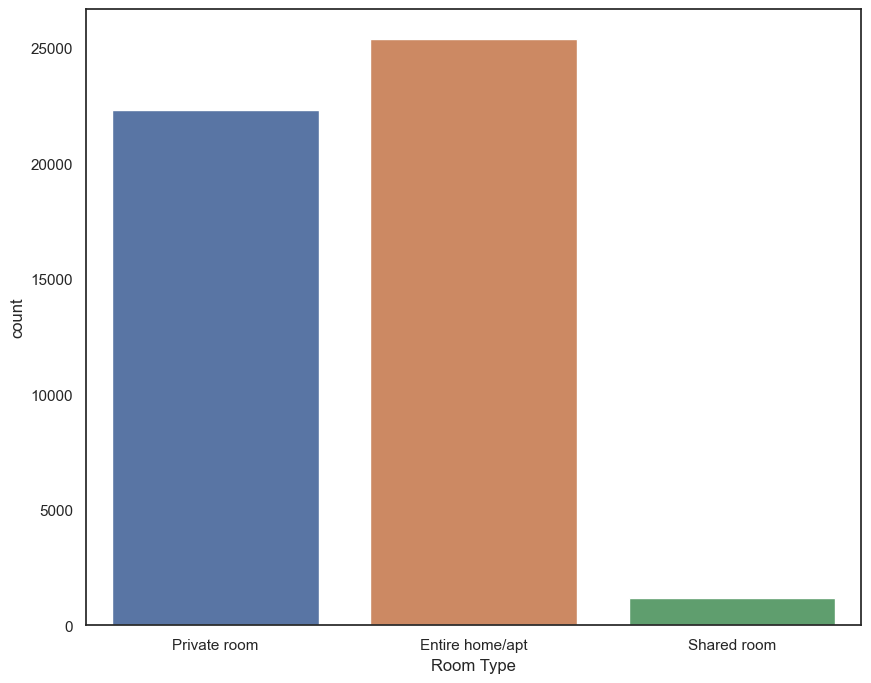

In [24]:
#EDA based on the rooms available across the boroughs 

#total room count
viz_6=sns.countplot(x = 'room_type', data = df,palette='deep')
plt.xlabel('Room Type')
plt.show()

From the next graph we can see the most of the listing are for entire home and shared room having the least listings

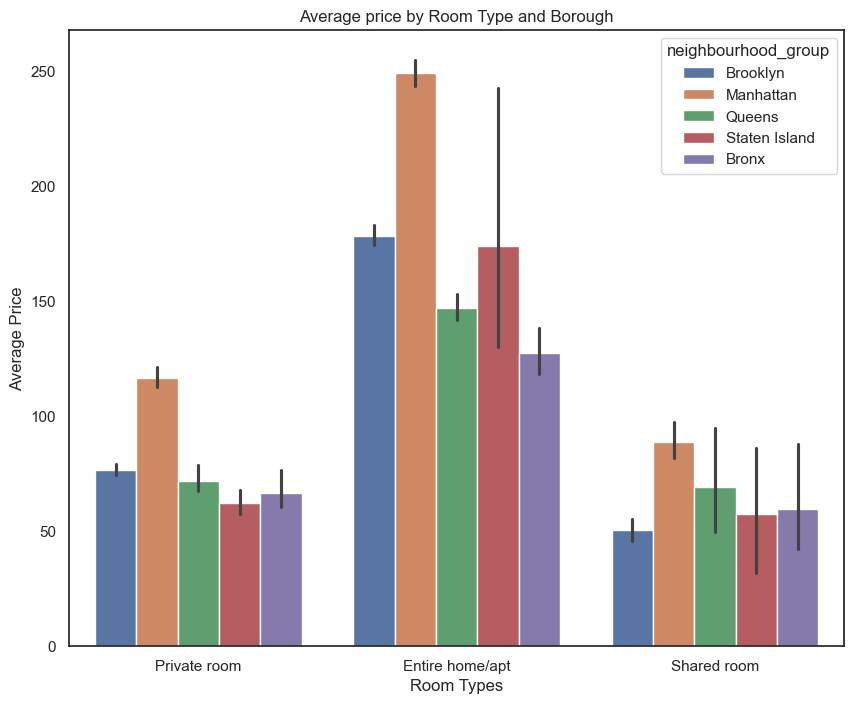

In [25]:
#average price on type of room in a borough

viz_7=sns.barplot(x = df['room_type'], y = df['price'], hue = df['neighbourhood_group'])
plt.title('Average price by Room Type and Borough')
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.show()

The eight graph typically depicts the average prices of the listings. From it we can observe for all the available room types Manhattan is more expensive. The entire homes had a higher average price and there is no noticeable difference in price for the other room type across all boroughs except Manhattan & Brooklyn 

C:\Users\maruv\AppData\Local\Temp\ipykernel_12012\1722441415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_8=sns.barplot(data=ded,palette='deep')


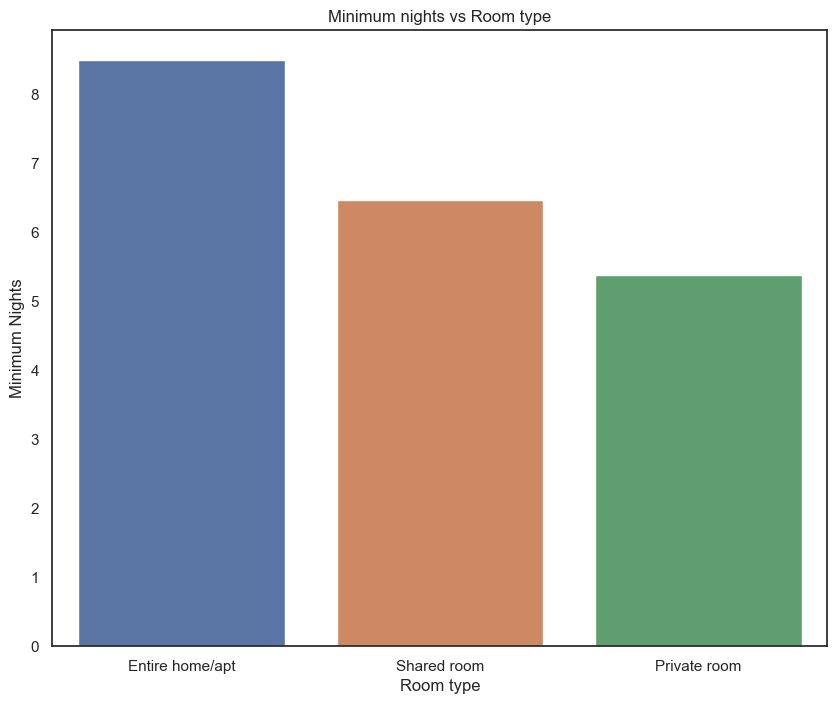

In [39]:
#minimum night a particular room is booked 
ded = df.groupby('room_type')['minimum_nights'].mean().sort_values(ascending = False)
viz_8=sns.barplot(data=ded,palette='deep')
plt.title('Minimum nights vs Room type')
plt.xlabel('Room type')
plt.ylabel('Minimum Nights')
plt.xticks(rotation = 0)
plt.show()


The last graph concludes that people renting out entire home stay at an average 8 days and people renting out private rooms stay the least amount of time 

In [40]:
sub_6.head()
sub_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47660 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            47644 non-null  object 
 1   host_id                         47660 non-null  int64  
 2   neighbourhood_group             47660 non-null  object 
 3   neighbourhood                   47660 non-null  object 
 4   latitude                        47660 non-null  float64
 5   longitude                       47660 non-null  float64
 6   room_type                       47660 non-null  object 
 7   price                           47660 non-null  int64  
 8   minimum_nights                  47660 non-null  int64  
 9   number_of_reviews               47660 non-null  int64  
 10  reviews_per_month               47660 non-null  float64
 11  calculated_host_listings_count  47660 non-null  int64  
 12  availability_365                47660

In [41]:
airbnb3 = sub_6.drop(['name','host_id'], axis=1)
airbnb3.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [42]:
z=airbnb3['neighbourhood_group'].nunique()
print(z)

y=airbnb3['neighbourhood'].nunique()
print(y)

j=airbnb3['room_type'].nunique()
print(j)

5
219
3


In [32]:
import sklearn
from sklearn.preprocessing import LabelEncoder
airbnb_le = airbnb3.copy()
le = LabelEncoder()
airbnb_le['neighbourhood_group'] = le.fit_transform(airbnb_le['neighbourhood_group'])
airbnb_le['neighbourhood'] = le.fit_transform(airbnb_le['neighbourhood'])
airbnb_le['room_type'] = le.fit_transform(airbnb_le['room_type'])
airbnb_le.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,93,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


(11.5, -0.5)

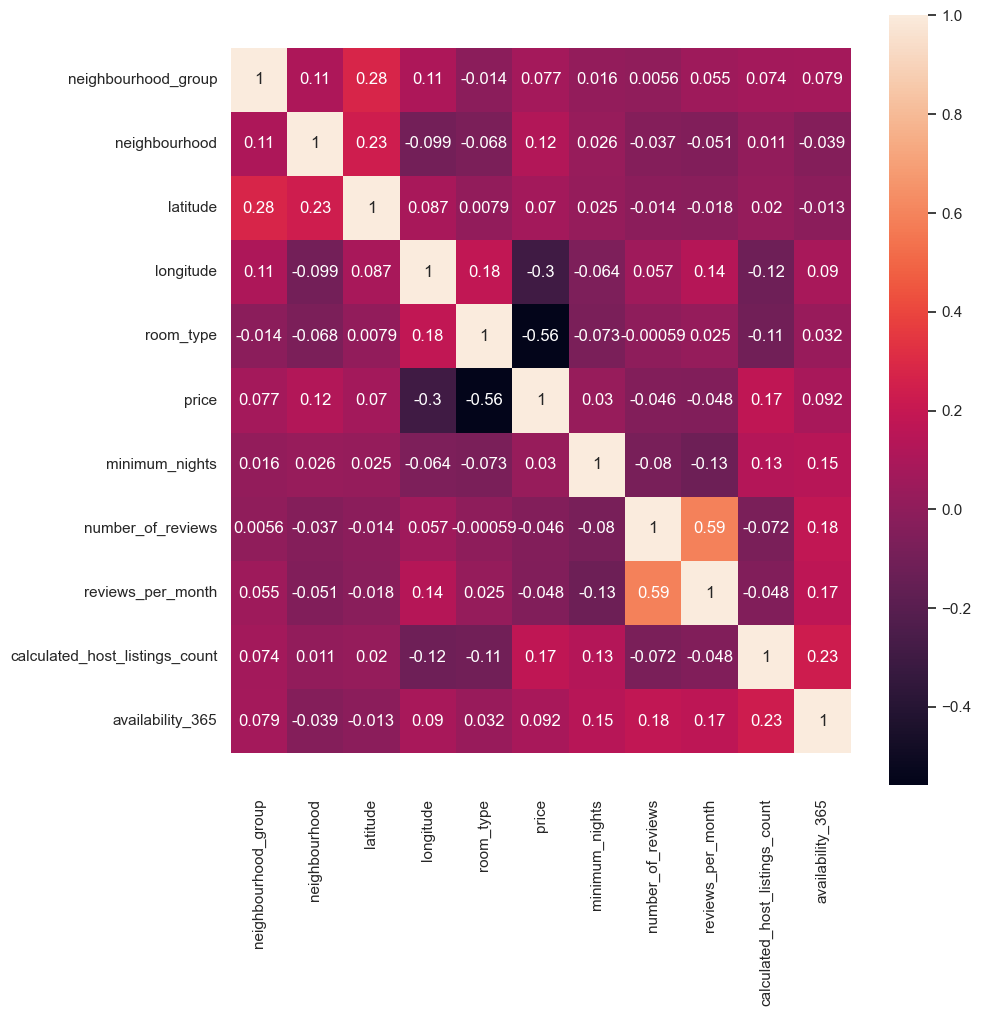

In [33]:
# preprocessing categorical columns using get_dummies method.
airbnb_dummies = pd.get_dummies(airbnb3)
airbnb_dummies.head()
corr = airbnb_le.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

From the correlation matrix It looks like the price is more related to the location and room type, which agrees with our previous analysis. It is interesting that the calculated_host_listings_count also shows a high correlation with the price.

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
def modeling(model, X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_score_train = r2_score(y_train, y_train_pred)
    r2_score_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    results = [r2_score_train, r2_score_test, rmse_train, rmse_test]
    
    return model, results
def showResults(results):
    r2_score_train, r2_score_test, rmse_train, rmse_test = results
    print('Results:')
    print('R2 score on training set: {:.3f}'.format(r2_score_train))
    print('R2 score on testing set: {:.3f}'.format(r2_score_test))
    print('RMSE on training set: {:.3f}'.format(rmse_train))
    print('RMSE on testing set: {:.3f}'.format(rmse_test))
scaler = StandardScaler()

# based on LabelEncoder method
X_le = airbnb_le.drop('price', axis=1)
X_le_scaled = scaler.fit_transform(X_le)
y_le = airbnb_le['price']

# based on get_dummies method
X_dm = airbnb_dummies.drop('price', axis=1)
X_dm_scaled = scaler.fit_transform(X_dm)
y_dm = airbnb_dummies['price']
# Decision tree regression using airbnb_le (based on LabelEncoder method) 

dt = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1)
dt_model_le, dt_results_le = modeling(dt, X_le, y_le)
print('Decision Tree Regression (based on LabelEncoder method):\n')
print('Model:\n', dt_model_le)
showResults(dt_results_le)

Decision Tree Regression (based on LabelEncoder method):

Model:
 DecisionTreeRegressor()
Results:
R2 score on training set: 1.000
R2 score on testing set: 0.061
RMSE on training set: 0.194
RMSE on testing set: 81.559


In [35]:
# Decision Tree, limiting max_depth and min_samples_leaf
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)
dt_model_le, dt_results_le = modeling(dt, X_le, y_le)
print('Decision Tree Regression (based on LabelEncoder method):\n')
print('Model:\n', dt_model_le)
showResults(dt_results_le)

Decision Tree Regression (based on LabelEncoder method):

Model:
 DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)
Results:
R2 score on training set: 0.592
R2 score on testing set: 0.463
RMSE on training set: 54.579
RMSE on testing set: 61.676


In [36]:
# using airbnb_dummies (based on get_dummies method) 

dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)
dt_model_dm, dt_results_dm = modeling(dt, X_dm, y_dm)
print('Decision Tree Regression (based on get_dummies method):\n')
print('Model:\n', dt_model_dm)
showResults(dt_results_dm)

Decision Tree Regression (based on get_dummies method):

Model:
 DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)
Results:
R2 score on training set: 0.589
R2 score on testing set: 0.472
RMSE on training set: 54.789
RMSE on testing set: 61.142


In [44]:
feature_importance = dt_model_dm.feature_importances_

attributes = list(X_le.columns)

sorted(zip(feature_importance, attributes), reverse=True)

[(0.15049953914258246, 'neighbourhood'),
 (0.09861917902858379, 'neighbourhood_group'),
 (0.05570868557004422, 'number_of_reviews'),
 (0.03352171309414405, 'latitude'),
 (0.02838547033560333, 'longitude'),
 (0.027086527233476577, 'minimum_nights'),
 (0.02090455085302396, 'room_type'),
 (0.0005166718924050217, 'calculated_host_listings_count'),
 (0.00014165181153903155, 'availability_365'),
 (3.4461429740118254e-05, 'reviews_per_month')]

on the basis of the decision tree we can see the most import features are room type and location

Conclusions 
•	Most of the listings in NYC are in Manhattan and Brooklyn. Both of them have more than 20,000 listings, which are over 85% of the overall listings. The neighbourhood with the most listings is Williamsburg in Brooklyn. 
•	Around 52% of listings are entire home/apt, and 45% are private room. Only 2% are shared rooms. Among different neighbourhood groups, Brooklyn has the most private rooms, while Manhattan has the most entire homes/apts.
•	The availability is lower in Brooklyn and Manhattan compared to other locations.
•	Some words are quite popular in the name such as 'private', 'beautiful', 'cozy', 'modern', and 'quiet'
Factors Affecting the price:
•	Location: The price in Manhattan is much higher than in other locations.
•	Room type: The entire home/apt is much more expensive than the private room and shared room. The private room is slightly more expensive than the shared room.
•	Host listings count: It looks like the listings that the calculated_host_listings_count equals to 1 are more expensive.
•	Minimum nights: No clear trend.
•	Availability: No clear trend.
Basis on which we can predict price:
•	According to the Decision Tree model, the most important features: 
•	Room Type 
•	Location
